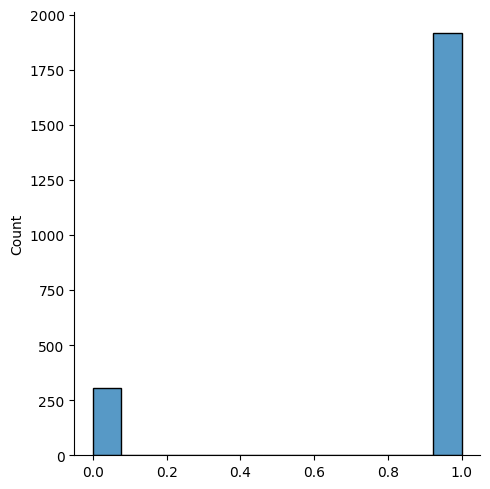

In [5]:
import pandas as pd
import numpy as np
from pipeline import pipeline
import matplotlib.pyplot as plt
import seaborn as sns
file = 'data/EscortDataLabelAll.csv'
df = pd.read_csv(file)
data = df[['tweet','SUSPICIOUS']].copy()
sns.displot(list(data['SUSPICIOUS']))
data = pipeline(data)
data=  data.returnDf()

In [6]:
#params
sdg_params  = dict(alpha=1e-5, penalty='l2', loss='log_loss')
vectorizer_params = dict(ngram_range=(1,2), min_df=3,max_df=.9)
svc_params = {'C': 10, 'gamma': 1, 'kernel': 'linear','probability':True}
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly','sigmoid']}
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier 

# pipelines
supervised_pipeline = Pipeline([
    ('vect',CountVectorizer(**vectorizer_params)),
    ('tfidf',TfidfTransformer()),
    ('clf',SGDClassifier(**sdg_params ))
])
svc_pipeline = Pipeline([
    ('vect',CountVectorizer(**vectorizer_params)),
    ('tfidf',TfidfTransformer()),
    ('clf',GridSearchCV(SVC(),param_grid,refit=True))
])

test = [1,2,3,0]
for i in test:
    pd.concat([test[test['SUSPICIOUS']==0],test[test['SUSPICIOUS']==1].sample(1*len(test[test['SUSPICIOUS']==0]))])

,tweet,SUSPICIOUS,clean_text,token,lement,final
0,rt @_just__v: available for romantic appointme...,1,justv available for romantic appointments ino...,"[justv, available, romantic, appointments, ino...","[justv, available, romantic, appointment, inor...",justv available romantic appointment inorlando...
1,requiring a #mature dinner companion in #orlan...,1,requiring a mature dinner companion in orlando...,"[requiring, mature, dinner, companion, orlando...","[requiring, mature, dinner, companion, orlando...",requiring mature dinner companion orlando comp...
2,wanting to plan a sensual escape in #orlando? ...,1,wanting to plan a sensual escape in orlando co...,"[wanting, plan, sensual, escape, orlando, comp...","[wanting, plan, sensual, escape, orlando, comp...",wanting plan sensual escape orlando companion ...
3,"Ã°ÂŸÂ“Â£well, now am i not only open for inqui...",1,well now am i not only open for inquires feb 4...,"[well, open, inquires, feb, 4th, 3rd, wellugh,...","[well, open, inquires, feb, 4th, 3rd, wellugh,...",well open inquires feb 4th 3rd wellugh cancell...
4,#orlando #florida &amp; surrounding cities. \n...,0,orlando florida amp surrounding cities kayolog...,"[orlando, florida, amp, surrounding, cities, k...","[orlando, florida, amp, surrounding, city, kay...",orlando florida amp surrounding city kayology ...
...,...,...,...,...,...,...
2216,"#mellabellaexperience \nhouston, tx book me \n...",1,mellabellaexperience houston tx book me hhr150...,"[mellabellaexperience, houston, tx, book, hhr1...","[mellabellaexperience, houston, tx, book, hhr1...",mellabellaexperience houston tx book hhr150hr2...
2217,had such an amazing time today for my photosho...,1,had such an amazing time today for my photosho...,"[amazing, time, today, photoshoot, cant, wait,...","[amazing, time, today, photoshoot, cant, wait,...",amazing time today photoshoot cant wait get re...
2218,astros won !!! Ã¢ÂšÂ¾Ã¯Â¸ÂÃ°ÂŸÂ¤Â˜Ã°ÂŸÂÂ¾ #h...,0,astros won houstonastros datehouston who wan...,"[astros, houstonastros, datehouston, wants, pa...","[astros, houstonastros, datehouston, want, party]",astros houstonastros datehouston want party
2219,#cameroon soldiers are said to have raided a v...,0,cameroon soldiers are said to have raided a vi...,"[cameroon, soldiers, said, raided, village, sw...","[cameroon, soldier, said, raided, village, sw,...",cameroon soldier said raided village sw region...
